In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as cx
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geodatasets


In [5]:
# # # Check The shift of the point
# idx = 500 # change here
# WITHOUT_PERMIT_DITE_PATH = '/share/ju/nexar_data/nexar-scraper/scaffolding/dataset_output/detected_scaffolding_dataset.csv'

# without_permit = pd.read_csv(WITHOUT_PERMIT_DITE_PATH)
# without_permit = without_permit[without_permit['PERMIT']==False]
# point2_list = pd.DataFrame(columns=['x','y'])
# THRESHOLD_DISTANCE = 2000  #<100m
# ind = without_permit.iloc[idx]
# CAMERA_HEADING = ind['camera_heading']
# print(f"{CAMERA_HEADING=}")
# # Convert initial coordinates to Point in EPSG:2263
# point1 = Point(ind['gps_info.longitude'], ind['gps_info.latitude'])
# point1_gdf = gpd.GeoDataFrame(geometry=[point1], crs='EPSG:4326')
# point1_gdf = point1_gdf.to_crs('EPSG:2263')

# # Calculate new coordinates in EPSG:2263 based on given heading and distance
# x_offset = THRESHOLD_DISTANCE * np.sin(np.radians(CAMERA_HEADING))
# y_offset = THRESHOLD_DISTANCE * np.cos(np.radians(CAMERA_HEADING))
# new_x = point1_gdf.geometry.x[0] + x_offset
# new_y = point1_gdf.geometry.y[0] + y_offset

# point2 = Point(new_x, new_y)
# point2_gdf = gpd.GeoDataFrame(geometry=[point2], crs='EPSG:2263')


# nyc = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs('EPSG:2263')

# fig, ax = plt.subplots(figsize=(200,200))


# nyc.plot(ax=ax, alpha=0.25, edgecolor='b')

# point1_gdf.plot(ax=ax, markersize=500, color='r')
# point2_gdf.plot(ax=ax, markersize=500, color='g')






In [2]:
# For all the coordinets that a scafoold was detected and not within permit area - shift the coordinets using the camera heading to show on which building are they. 
WITHOUT_PERMIT_DIR_PATH = '/share/ju/nexar_data/nexar-scraper/scaffolding/dataset_output/detected_scaffolding_dataset_coorectpath.csv'

# Read the data and filter it
without_permit = pd.read_csv(WITHOUT_PERMIT_DIR_PATH)
without_permit = without_permit[without_permit['PERMIT'] == False]

# Convert initial coordinates to Point in EPSG:2263
without_permit['geometry'] = gpd.points_from_xy(without_permit['gps_info.longitude'], without_permit['gps_info.latitude'])
gdf = gpd.GeoDataFrame(without_permit, geometry='geometry', crs='EPSG:4326')
gdf = gdf.to_crs('EPSG:2263')

# Calculate new coordinates in EPSG:2263 based on given heading and distance
THRESHOLD_DISTANCE = 300  # <100m
x_offsets = THRESHOLD_DISTANCE * np.sin(np.radians(gdf['camera_heading']))
y_offsets = THRESHOLD_DISTANCE * np.cos(np.radians(gdf['camera_heading']))

gdf['new_x'] = gdf.geometry.x + x_offsets
gdf['new_y'] = gdf.geometry.y + y_offsets

# Create dataframe of new points
point2_list = pd.DataFrame({'x': gdf['new_x'], 'y': gdf['new_y']})
point2_gdf = gpd.GeoDataFrame(point2_list, geometry=gpd.points_from_xy(point2_list['x'], point2_list['y'], crs='EPSG:2263'))


In [15]:
without_permit.head()

,image_name,camera_heading,gps_info.latitude,gps_info.longitude,LATITUDE,LONGITUDE,PERMIT,PATH,BOROUGH,Bin #,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME,Full Address,geometry
0,892b0a56005cea35b07efa6a049aff7b,344.056580,40.842917,-73.784858,NaN,NaN,False,/share/ju/nexar_data/2023/2023-08-10/604222321...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.78486 40.84292)
20,f1d727fde91bd02cd78c8e704b9e5635,52.389999,40.880373,-73.867984,NaN,NaN,False,/share/ju/nexar_data/2023/2023-08-10/604222321...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.86798 40.88037)
21,0398fecebee370368621dcc693c97b2b,113.047318,40.874779,-73.858266,NaN,NaN,False,/share/ju/nexar_data/2023/2023-08-10/604222321...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.85827 40.87478)
22,54a0e89ecd415f3f62893821c573d550,257.230011,40.882775,-73.889069,NaN,NaN,False,/share/ju/nexar_data/2023/2023-08-10/604222321...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.88907 40.88278)
23,1309245dd336edab26117359c0f0c087,344.233063,40.885096,-73.894017,NaN,NaN,False,/share/ju/nexar_data/2023/2023-08-10/604222321...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.89402 40.88510)


In [3]:
# upload the district (shape files)

COMMUNITY_DISTRICT = '/share/ju/nexar_data/nexar-scraper/scaffolding/building_footprint/nyct2020_23c/nyct2020.shp'
district_gdf = gpd.read_file(COMMUNITY_DISTRICT, rows=slice(0, 4))
district_gdf.to_crs('EPSG:2263', inplace=True)

#Upload the buildings footprint shape geojson files 
BUILDING_FOOTPRINT_PATH = '/share/ju/nexar_data/nexar-scraper/scaffolding/building_footprint/building (1).geojson'
local_buildings_gdf  =  gpd.read_file(BUILDING_FOOTPRINT_PATH)
local_buildings_gdf.to_crs('EPSG:2263', inplace=True)

# Use sjoin commaned to combine the polygon areas
local_buildings_w_district =  gpd.sjoin(local_buildings_gdf, district_gdf)


In [8]:
local_buildings_w_district.iloc[2:-1]

,name,base_bbl,shape_area,heightroof,mpluto_bbl,cnstrct_yr,globalid,lststatype,feat_code,groundelev,...,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area
9575,NaN,1002830097,0.0,42.6,1002830097,1900,{6B8811BE-DEC2-4F97-A5D9-82CD82403E82},Constructed,2100,39,...,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2.582705e+06
16032,NaN,1002730026,0.0,52.04,1002730026,1910,{D24262BB-B902-4CF5-AB1C-8A3E11144390},Constructed,2100,27,...,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2.582705e+06
16739,NaN,1002850007,0.0,67.64,1002850007,1900,{1146557E-7C08-4888-8735-7CF5F202C488},Constructed,2100,24,...,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2.582705e+06
18789,NaN,1002850018,0.0,54.26,1002850018,1910,{D524104D-24EB-471E-9024-BF94BEAD7A1D},Constructed,2100,28,...,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2.582705e+06
20663,NaN,1002830063,0.0,52.55,1002830063,1900,{9BB802D5-B96F-41D4-A569-0C89B95471F8},Constructed,2100,37,...,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2.582705e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568556,NaN,1003110031,0.0,68.45,1003110031,1909,{12D0BFE6-15F0-4BFB-A325-435BCB1876D3},Constructed,2100,26,...,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332000,1.006117e+06
642095,NaN,1003110001,0.0,19.37,1003110001,1935,{49C793B3-EA32-4DAE-906F-833E743FC447},Constructed,2100,29,...,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332000,1.006117e+06
644163,NaN,1003150001,0.0,188.07,1003150001,1960,{D09318B8-2F57-47F2-BF83-399160400431},Constructed,2100,40,...,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332000,1.006117e+06
687490,NaN,1003150001,0.0,189.65,1003150001,1960,{D952E056-9428-4FD5-965D-A1D00B73035B},Constructed,2100,39,...,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332000,1.006117e+06


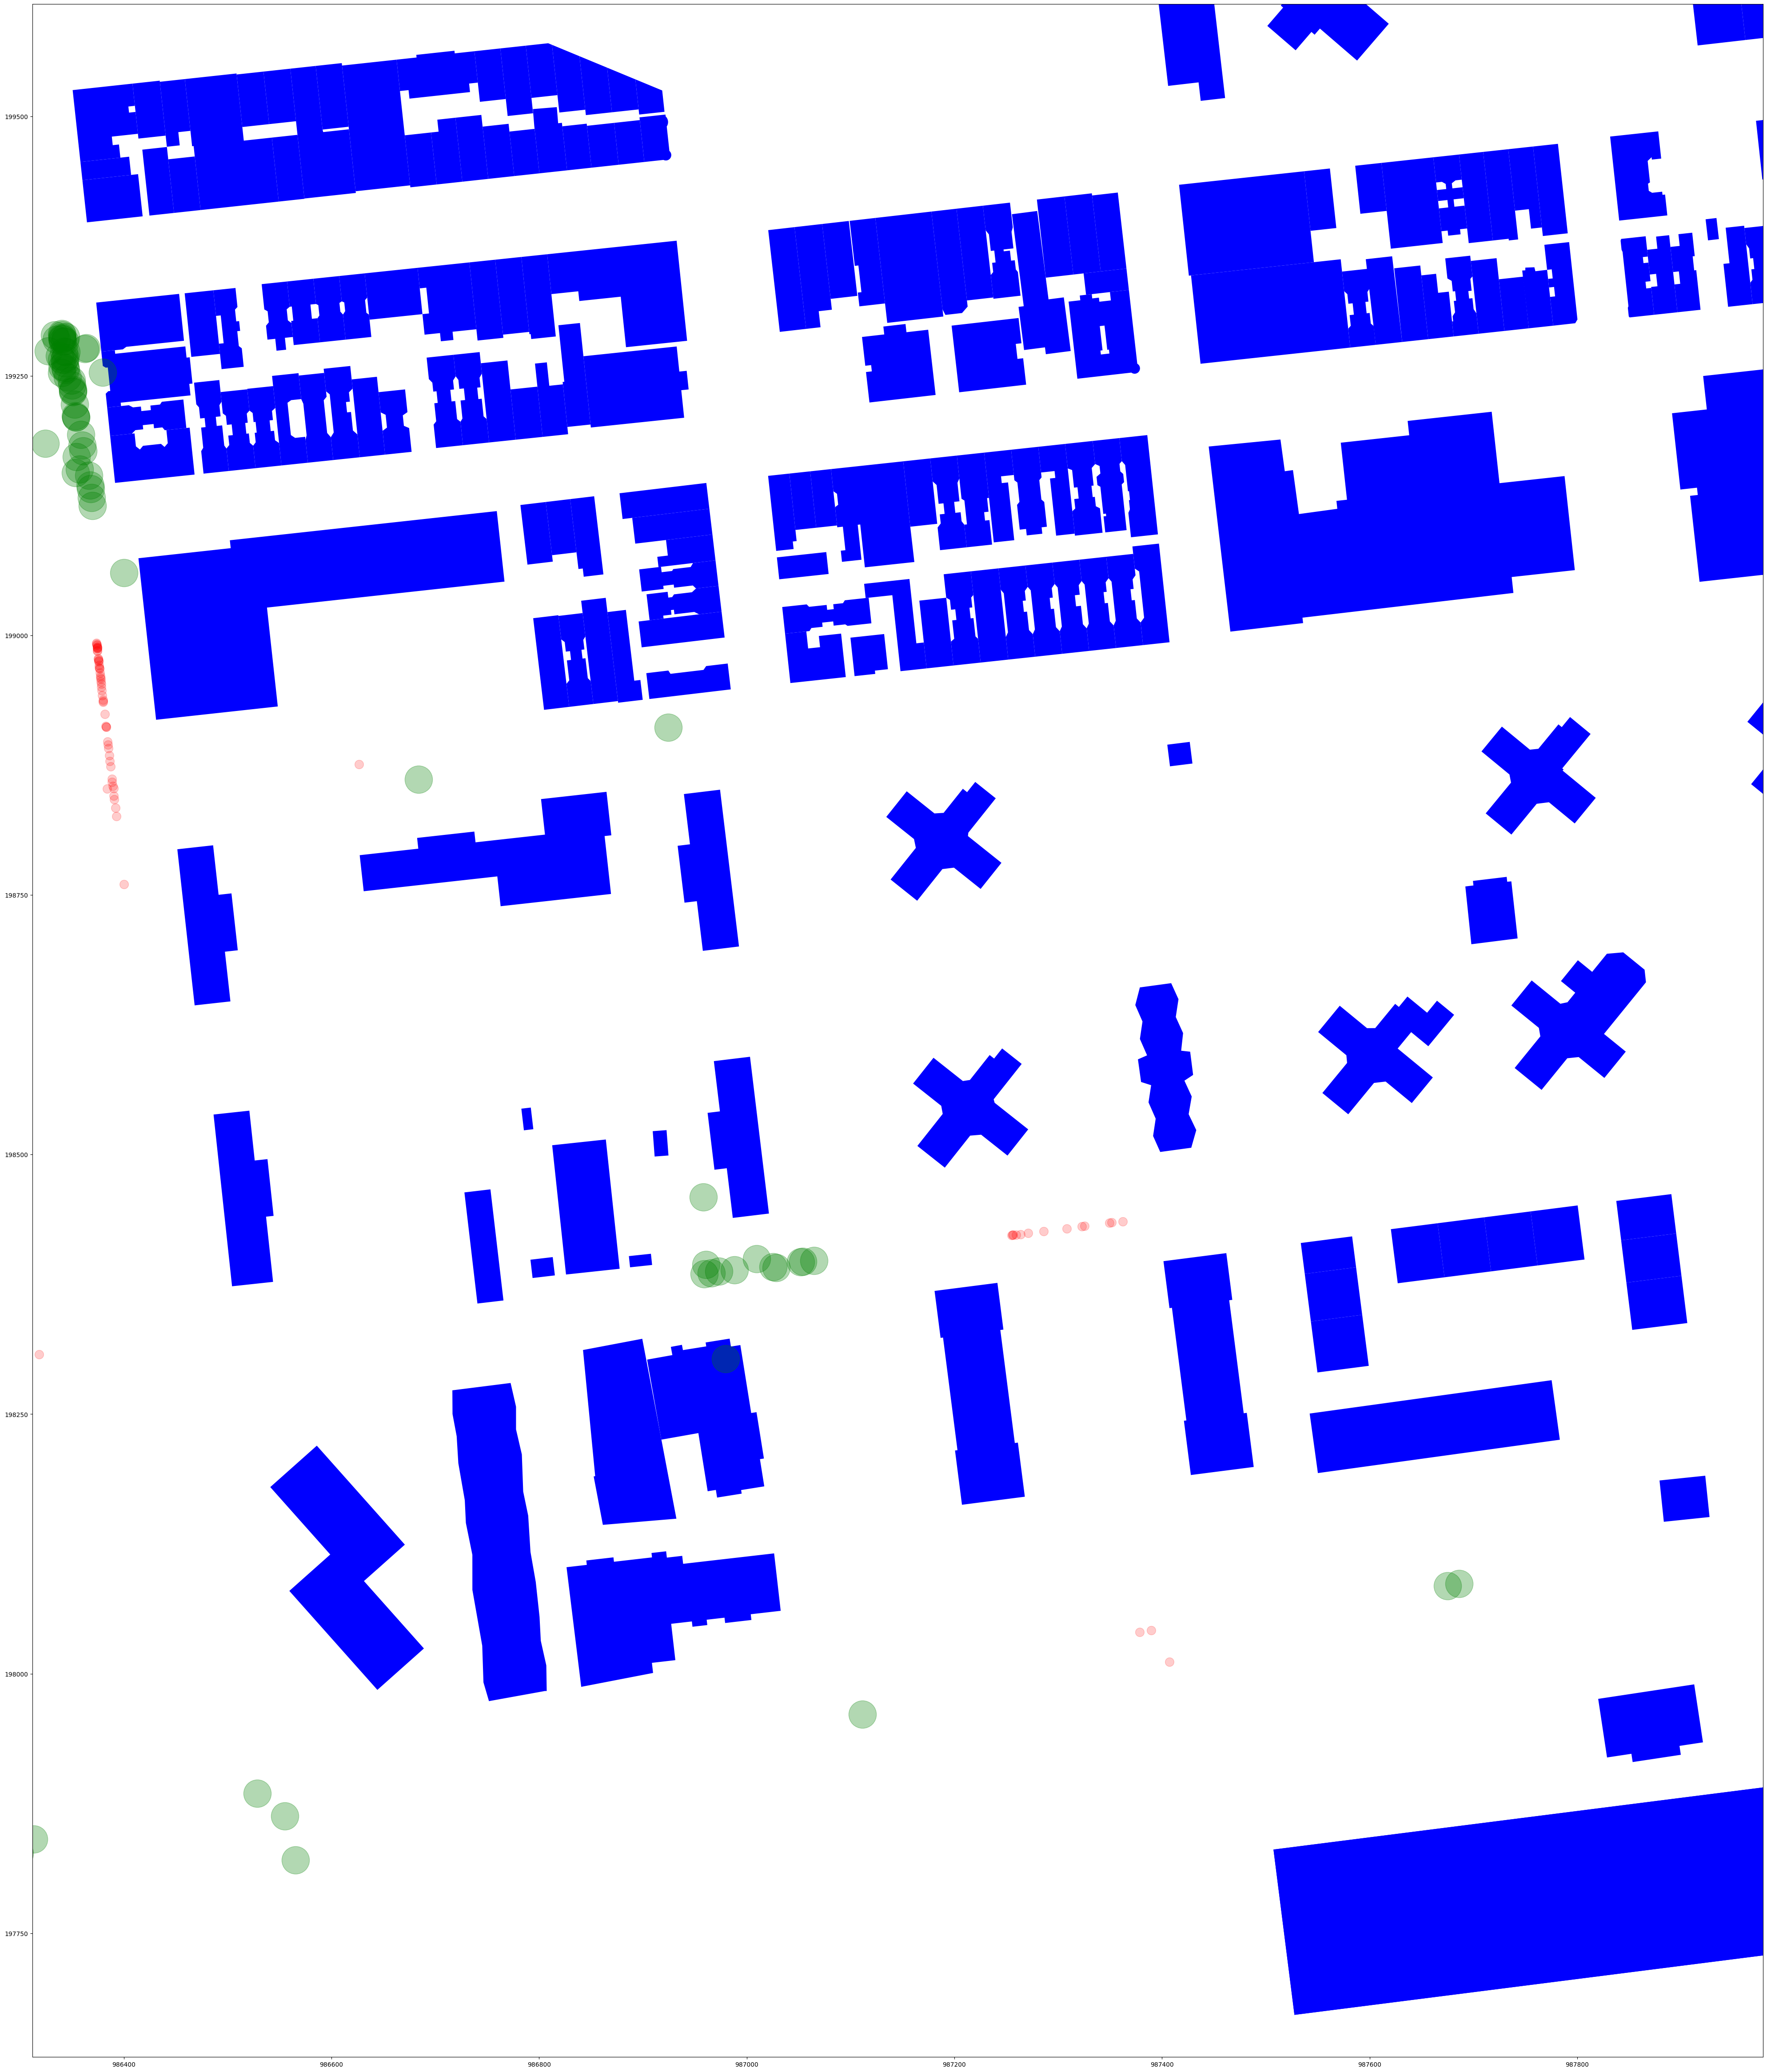

In [6]:
## Check - Plot for one district
fig, ax = plt.subplots(figsize=(60,60))
local_buildings_w_district.plot(ax=ax, color='blue')
#Set Limit 
minx, miny, maxx, maxy = district_gdf.iloc[2:3].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
gdf.plot(ax=ax, markersize=200, alpha=0.2, color='r')
point2_gdf.plot(ax=ax, markersize=2000, alpha=0.3, color='g')
# # Annotate each point with its index
# for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, without_permit['image_name']):
#     ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', size=50)

plt.show()

/tmp/ipykernel_392411/3012136122.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs('EPSG:2263')


<Axes: >

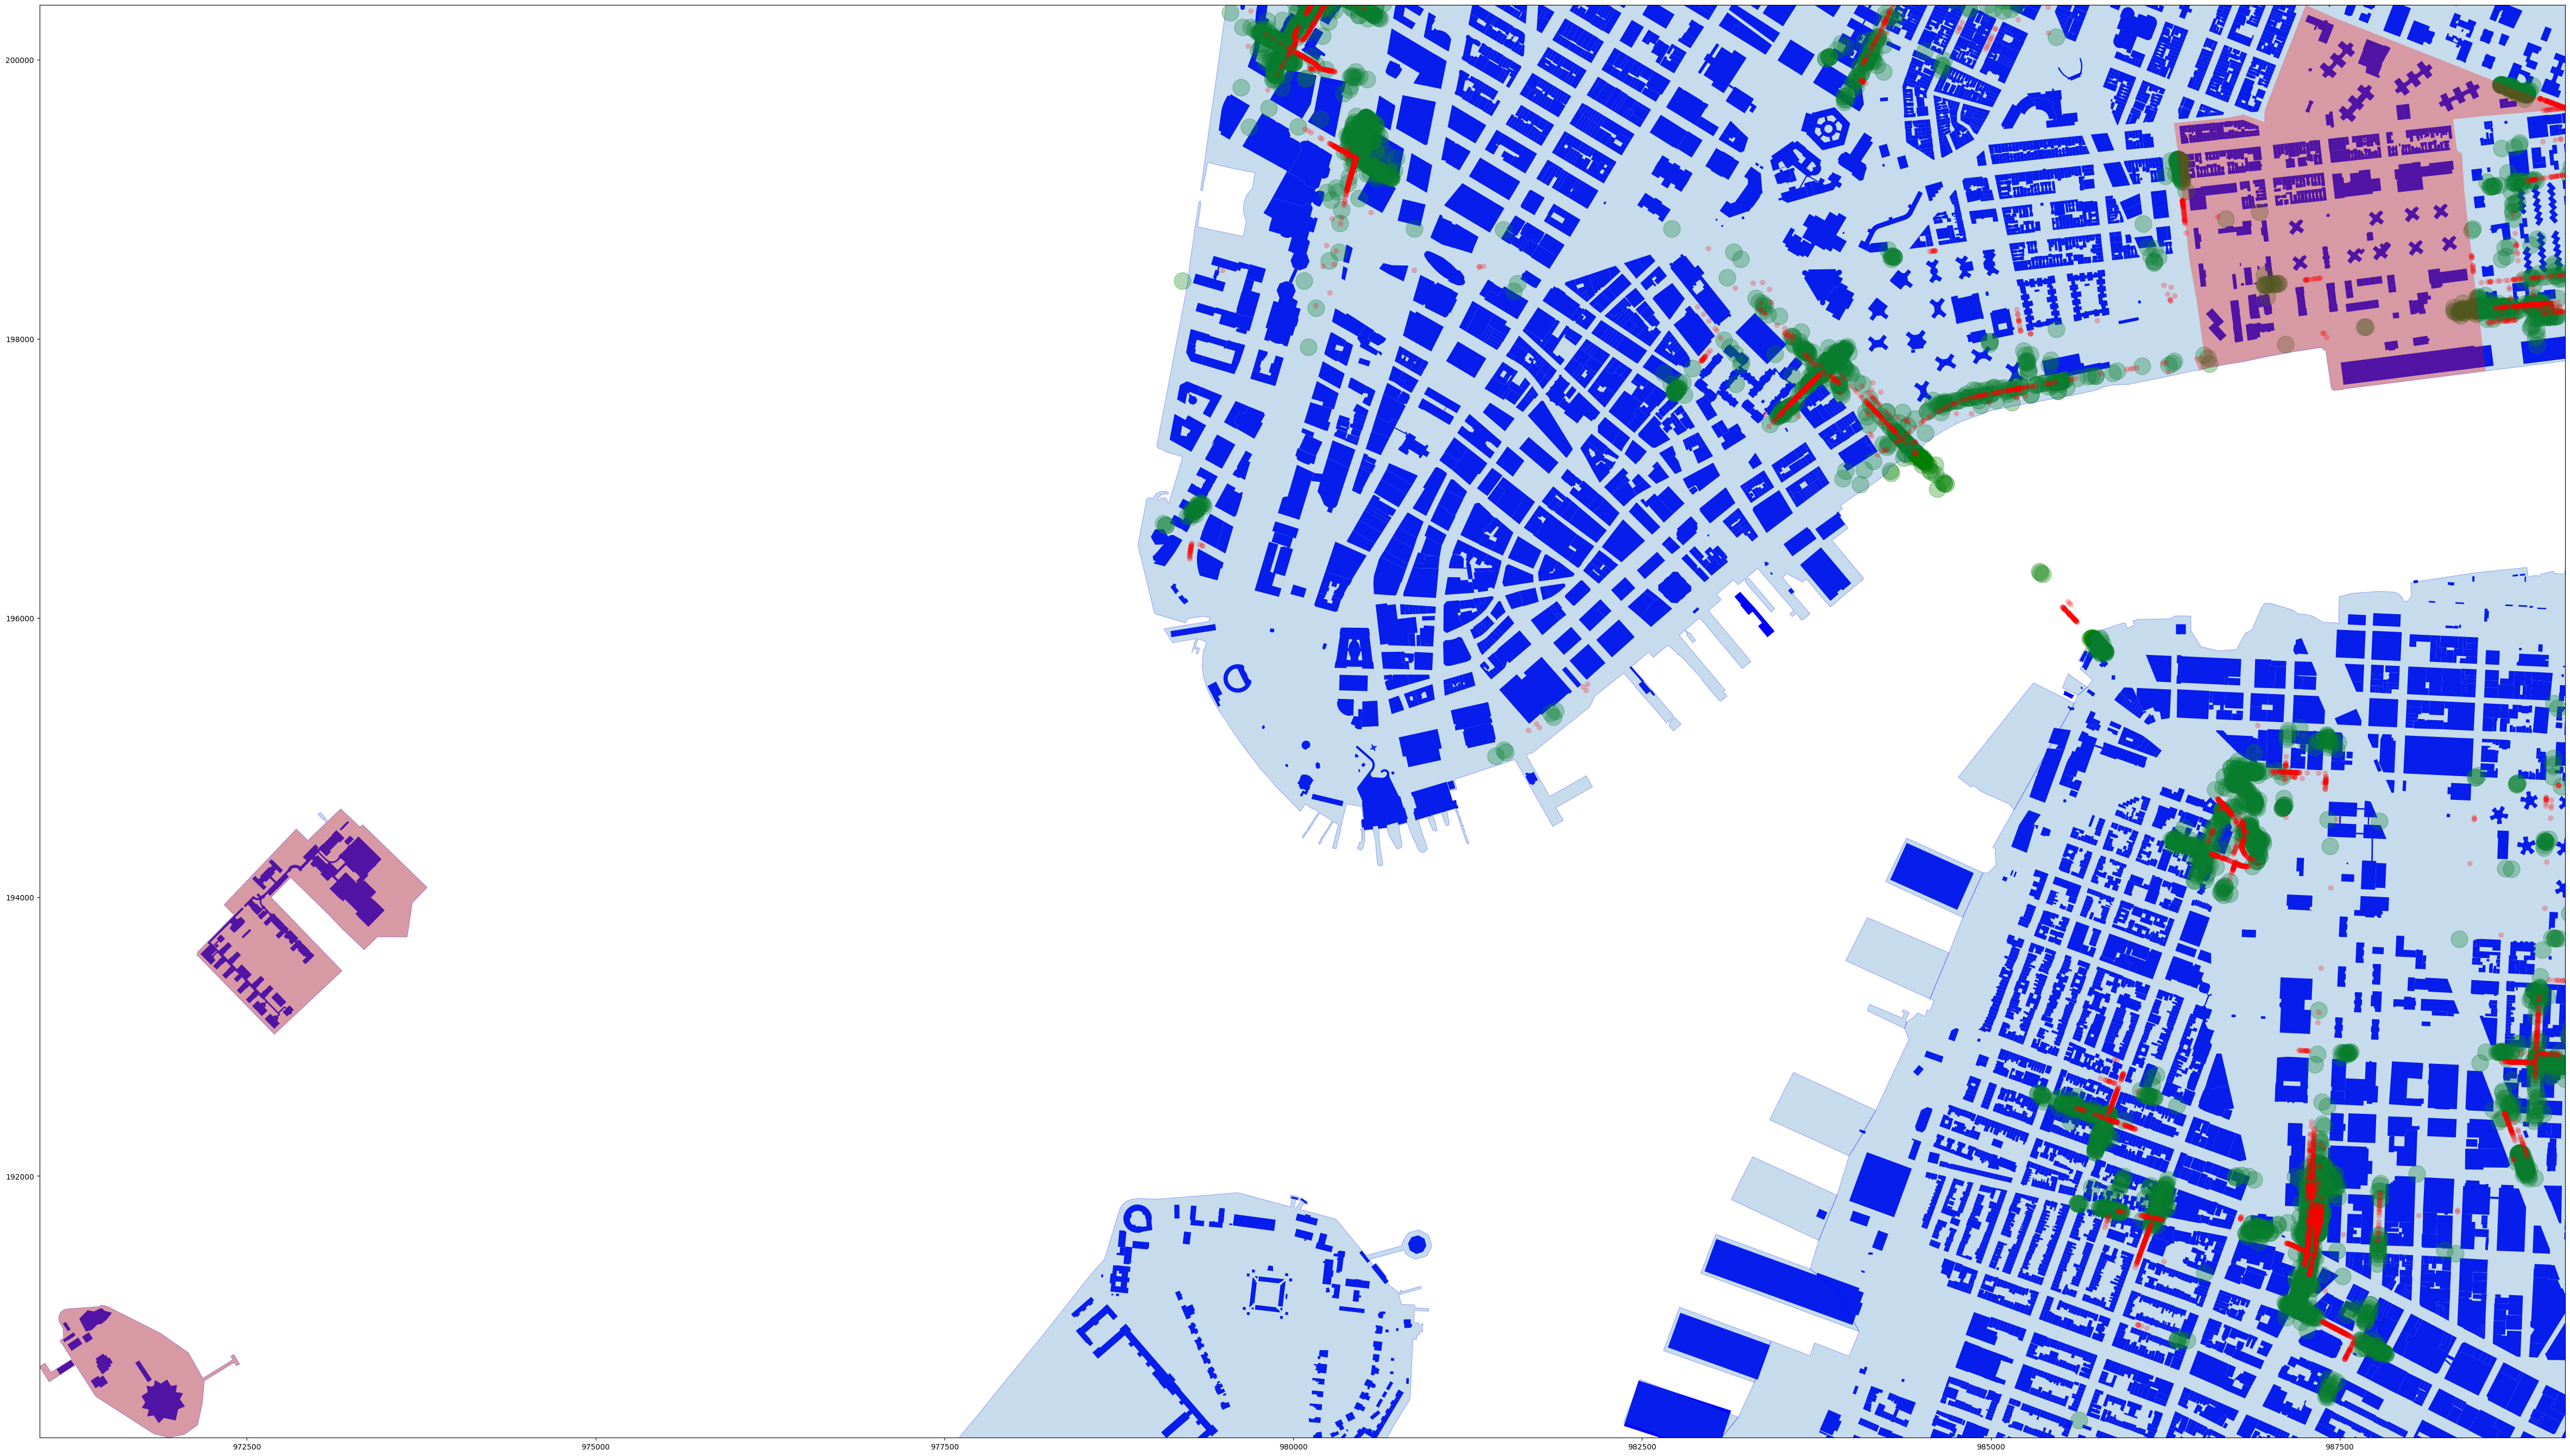

In [5]:
## plot the full map
nyc = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs('EPSG:2263')
permit_gdf = gpd.GeoDataFrame(without_permit, geometry=gpd.points_from_xy(without_permit['gps_info.longitude'], without_permit['gps_info.latitude'], crs='EPSG:4326'))
permit_gdf = permit_gdf.to_crs('EPSG:2263')
buffered_buildings = permit_gdf.buffer(distance=20)

fig, ax = plt.subplots(figsize=(60,60))

#Set Limit 
minx, miny, maxx, maxy = district_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

local_buildings_gdf.plot(ax=ax, color='blue')
point2_gdf.plot(ax=ax, markersize=500, alpha=0.3, color='g')
nyc.plot(ax=ax, alpha=0.25, edgecolor='b')
buffered_buildings.plot(ax=ax, markersize=50, color='red', label='Permit area', alpha = 0.25)
district_gdf.plot(ax=ax, color='red', alpha=0.3)

